# Redes Neuronales Artificiales (RNA)


## Parte 1 - Preprocesado de los datos

### Importar las librerías


In [ ]:
!pip install scikeras[tensorflow]  # Para utilizar la clase KerasClassifier()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier


### Importar el dataset


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/MyDrive/deeplearning-az/Notebooks/Part 1 - Artificial Neural Networks (ANN)"

Mounted at /content/drive
/content/drive/MyDrive/deeplearning-az/Notebooks/Part 1 - Artificial Neural Networks (ANN)


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



### Codificar datos categóricos


In [ ]:
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)
y = df["Exited"]

X = X.values  # Nos quedamos con los valores de las variables dependientes
y = y.values  # Nos quedamos con los valores de la variables respuesta


### Dividir el dataset en Conjunto de Entrenamiento y Conjunto de Test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Escalado de variables


In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Parte 2 - Construir la RNA




In [ ]:
# Inicializar la RNA
classifier = Sequential()

# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units=6, kernel_initializer="uniform",
                     activation="relu", input_dim=11))
classifier.add(Dropout(rate=0.1))

# Añadir la segunda capa oculta
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))
classifier.add(Dropout(rate=0.1))

# Añadir la capa de salida
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

# Compilar la RNA
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 9s 8ms/step - loss: 0.5229 - accuracy: 0.7959
Epoch 2/100
800/800 [==============================] - 5s 7ms/step - loss: 0.4326 - accuracy: 0.8035
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4138 - accuracy: 0.8125
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3980 - accuracy: 0.8289
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3905 - accuracy: 0.8434
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3946 - accuracy: 0.8418
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3881 - accuracy: 0.8447
Epoch 8/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3810 - accuracy: 0.8505
Epoch 9/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3768 - accuracy: 0.8471
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3838 - accura

## Parte 3 - Evaluar el modelo y calcular predicciones finales


### Predicción de los resultados con el Conjunto de Test

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


### Elaborar una matriz de confusión



              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.50      0.60       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



<Axes: >

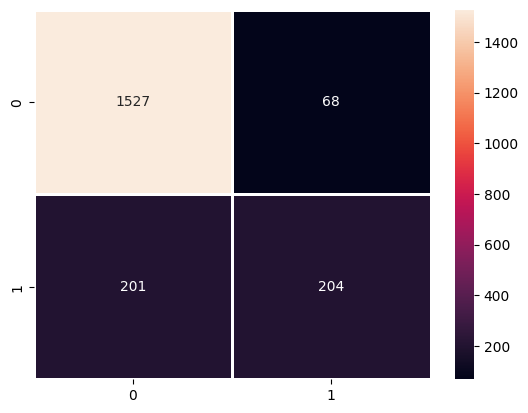

In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, linewidths=1, annot=True, fmt=".0f")

In [ ]:
# Valor del accuracy
acc = (cm[0][0] + cm[1][1]) / cm.sum()
print(acc)

0.8655


## RETO FINAL: ¿Deberíamos despedirnos de ese cliente?

Utiliza nuestro modelo de RNA para predecir si el cliente con la siguiente información abandonará el banco:

- Geografia: Francia

- Puntaje de crédito: 600

- Género masculino

- Edad: 40 años de edad

- Tenencia: 3 años.

- Saldo: $\$60000$

- Número de productos: 2

- ¿Este cliente tiene una tarjeta de crédito? Sí

- ¿Es este cliente un miembro activo? Sí

- Salario estimado: $\$50000$

Entonces, ¿deberíamos decir adiós a ese cliente?

In [ ]:
# Escalamos la observación
X_test_observacion = sc_X.transform(np.array([[600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]]))

# Escalamos la observación
y_pred_observacion = classifier.predict(X_test_observacion)

# Establecemos punto de corte donde se determina cuando es 0/1 (False/True)
y_pred_observacion = (y_pred_observacion > 0.5)

if y_pred_observacion:
    print("Se predice que el cliente SÍ abandonará el banco")
else:
    print("Se predice que el cliente NO abandonará el banco")

1/1 [==============================] - 0s 26ms/step
Se predice que el cliente NO abandonará el banco


## Parte 4 - Evaluar, mejorar y Ajustar la RNA

### Evaluar la RNA

In [ ]:
def build_classifier():
    # Inicializar la RNA
    classifier = Sequential()

    # Añadir las capas de entrada y primera capa oculta
    classifier.add(Dense(units=6, kernel_initializer="uniform",
                         activation="relu", input_dim=11))

    # Añadir la segunda capa oculta
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))

    # Añadir la capa de salida
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

    # Compilar la RNA
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # Devolver el clasificador
    return classifier

In [ ]:
classifier = KerasClassifier(model=build_classifier, batch_size=10, epochs=100)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=None, verbose=1)

Epoch 1/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4882 - accuracy: 0.7956
Epoch 2/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.7960
Epoch 3/100
720/720 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.7960
Epoch 4/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4213 - accuracy: 0.8112
Epoch 5/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4189 - accuracy: 0.8214
Epoch 6/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4172 - accuracy: 0.8242
Epoch 7/100
720/720 [==============================] - 2s 3ms/step - loss: 0.4155 - accuracy: 0.8296
Epoch 8/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4144 - accuracy: 0.8297
Epoch 9/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8307
Epoch 10/100
720/720 [==============================] - 1s 2ms/step - loss: 0.4120 - accura

In [ ]:
accuracies

array([0.845  , 0.83875, 0.8725 , 0.8325 , 0.8375 , 0.85125, 0.83625,
       0.84625, 0.8375 , 0.8775 ])

In [ ]:
mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)

0.8474999999999999
0.014747881203752615


### Mejorar la RNA
#### Regularización de Dropout para evitar el *overfitting*

### Ajustar la RNA

In [ ]:
classifier = KerasClassifier(model=build_classifier)

In [ ]:
parameters = {
    "batch_size" : [32, 64],
    "epochs": [200, 500],
    "optimizer" : ["adam", "rmsprop"]
}

In [ ]:
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           verbose=1)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Se han truncado las últimas 5000 líneas del flujo de salida.
100/100 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.7959
Epoch 4/500
100/100 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.7959
Epoch 5/500
100/100 [==============================] - 0s 4ms/step - loss: 0.4346 - accuracy: 0.7959
Epoch 6/500
100/100 [==============================] - 1s 5ms/step - loss: 0.4323 - accuracy: 0.7959
Epoch 7/500
100/100 [==============================] - 0s 5ms/step - loss: 0.4309 - accuracy: 0.7959
Epoch 8/500
100/100 [==============================] - 1s 5ms/step - loss: 0.4296 - accuracy: 0.7959
Epoch 9/500
100/100 [==============================] - 0s 4ms/step - loss: 0.4285 - accuracy: 0.7959
Epoch 10/500
100/100 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.7959
Epoch 11/500
100/100 [==============================] - 0s 5ms/step - loss: 0.4264 - accuracy: 0.7959
Epoch 12/500
100/100 [==================

In [ ]:
print(best_parameters)
print(best_accuracy)

{'batch_size': 32, 'epochs': 500, 'optimizer': 'adam'}
0.8477500000000001


## RETO FINAL: A por la medalla de oro del podio

En el código anterior se han utilizado los siguientes posibles de hiperparámetros:

```python
parameters = {
    "batch_size" : [32, 64],
    "epochs": [200, 500],
    "optimizer" : ["adam", "rmsprop"]
}
```

Se ha fijado un Cross Validation `cv=5`.

El mejor accuracy obtenido ha sido de 0.8502.

- Medalla de oro🥇: No Conseguida ❌

- Medalla de plata🥈: No Conseguida ❌

- Medalla de bronce🥉: Conseguida ✅

Ampliando el rango de valores de la parrilla de GridSearch (hiperparámetros), así como los folds `cv` del Cross Validation y el número de capas ocultas así como sus nodos, es posible aumentar el valor del accuracy. Por los largos tiempos de entrenamiento se ha decidido utilizar únicamente los anteriores.